In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import scipy.stats as st

In [2]:
df=pd.read_csv('/content/cars_sampled (1).csv',encoding="ISO-8859-1")


In [3]:
df.seller.value_counts()

private       49999
commercial        2
Name: seller, dtype: int64

In [4]:
df.offerType.value_counts()

offer      49998
request        3
Name: offerType, dtype: int64

In [5]:
df.notRepairedDamage.value_counts()

no     35337
yes     4948
Name: notRepairedDamage, dtype: int64

In [6]:
cols = ['seller', 'offerType', 'notRepairedDamage']
df.drop(columns=cols, inplace=True)
df.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,16/03/2016 0:00,55270,1/4/2016 23:18


In [7]:
df.abtest.value_counts()


test       25869
control    24132
Name: abtest, dtype: int64

In [8]:
abtest_stats=df.groupby("abtest").agg({"price":["mean","var","count"]})
abtest_stats

price                     
                mean           var  count
abtest                                   
control  6311.930424  4.600660e+09  24132
test     6791.152654  9.943525e+09  25869

In [9]:
z_abtest = (abtest_stats[('price', 'mean')][1]-
            abtest_stats[('price','mean')][0])/np.sqrt((abtest_stats[('price', 'var')][1]/abtest_stats[('price', 'count')][1]) 
            +(abtest_stats[('price','var')][0] / abtest_stats[('price', 'count')][0]))
print(f"Probablity of std-normal:{st.norm.sf(abs(z_abtest))}")

Probablity of std-normal:0.2637047048274638


In [10]:
df.vehicleType.value_counts()

limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

In [11]:
df.gearbox.value_counts()

manual       36732
automatic    10445
Name: gearbox, dtype: int64

In [12]:
df.model.value_counts()

golf          3972
others        3441
3er           2816
polo          1780
corsa         1701
              ... 
serie_2          1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 248, dtype: int64

In [13]:
df.fuelType.value_counts()

petrol     30214
diesel     14347
lpg          778
cng           80
hybrid        39
other         26
electro       14
Name: fuelType, dtype: int64

In [14]:
df.brand.value_counts()

volkswagen        10646
bmw                5507
opel               5392
mercedes_benz      4761
audi               4463
ford               3345
renault            2457
peugeot            1513
fiat               1238
seat               1007
mazda               769
skoda               767
nissan              729
smart               718
citroen             698
toyota              602
sonstige_autos      546
volvo               476
hyundai             468
mini                446
mitsubishi          419
honda               347
kia                 325
porsche             312
suzuki              301
alfa_romeo          284
chevrolet           244
chrysler            187
dacia               136
subaru              130
jeep                106
land_rover           92
jaguar               87
daihatsu             86
trabant              84
saab                 74
daewoo               73
lancia               70
rover                63
lada                 33
Name: brand, dtype: int64

In [15]:
cols = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,4450,1,3,2003,1,150,11,150000,3,1,2,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,13299,0,8,2005,1,163,243,150000,6,1,39,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,3200,1,0,2003,1,101,221,150000,11,1,38,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,4500,0,6,2006,1,86,120,60000,12,7,30,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,18750,1,8,2008,0,185,243,150000,11,1,39,16/03/2016 0:00,55270,1/4/2016 23:18


In [16]:
df.corr()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
price,1.000000,0.002790,-0.011208,0.017604,-0.018165,0.020429,-0.002403,-0.045458,0.000582,-0.013127,-0.007697,0.005916
abtest,0.002790,1.000000,0.005034,0.003324,-0.003996,0.001375,-0.001415,-0.003027,0.000621,0.004686,0.006246,0.003096
vehicleType,-0.011208,0.005034,1.000000,0.000573,-0.000225,-0.035590,-0.037315,0.020446,0.006124,-0.035184,0.012066,-0.013254
yearOfRegistration,0.017604,0.003324,0.000573,1.000000,0.029205,-0.004394,0.008299,-0.064188,-0.023152,-0.012598,0.004461,-0.001615
gearbox,-0.018165,-0.003996,-0.000225,0.029205,1.000000,-0.142459,0.046735,0.005481,-0.123792,0.126904,0.120576,0.003200
powerPS,0.020429,0.001375,-0.035590,-0.004394,-0.142459,1.000000,-0.035191,-0.016447,0.034345,-0.044093,-0.083801,0.017415
model,-0.002403,-0.001415,-0.037315,0.008299,0.046735,-0.035191,1.000000,-0.043010,-0.028372,-0.034566,0.435585,-0.051870
kilometer,-0.045458,-0.003027,0.020446,-0.064188,0.005481,-0.016447,-0.043010,1.000000,0.001985,-0.104424,-0.031284,-0.024076
monthOfRegistration,0.000582,0.000621,0.006124,-0.023152,-0.123792,0.034345,-0.028372,0.001985,1.000000,-0.062377,-0.018635,0.019050
fuelType,-0.013127,0.004686,-0.035184,-0.012598,0.126904,-0.044093,-0.034566,-0.104424,-0.062377,1.000000,0.038798,-0.014061


In [17]:
cols = ['abtest', 'model', 'monthOfRegistration', 'brand', 'postalCode']
df.drop(columns=cols, inplace=True)
df.head()

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,dateCreated,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,4450,3,2003,1,150,150000,1,30/03/2016 0:00,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,13299,8,2005,1,163,150000,1,7/3/2016 0:00,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,3200,0,2003,1,101,150000,1,31/03/2016 0:00,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,4500,6,2006,1,86,60000,7,19/03/2016 0:00,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,18750,8,2008,0,185,150000,1,16/03/2016 0:00,1/4/2016 23:18


In [18]:
cols = ['dateCrawled', 'name', 'dateCreated', 'lastSeen']
df.drop(columns=cols, inplace=True)
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType
0,4450,3,2003,1,150,150000,1
1,13299,8,2005,1,163,150000,1
2,3200,0,2003,1,101,150000,1
3,4500,6,2006,1,86,60000,7
4,18750,8,2008,0,185,150000,1


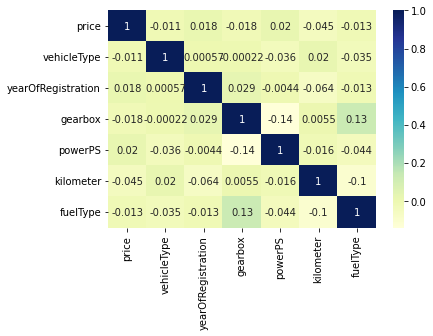

In [19]:
cor = df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [20]:
print(cor['price'])
print('Highestvalue of : kilometer (abs vale of 0.045458)')

price                 1.000000
vehicleType          -0.011208
yearOfRegistration    0.017604
gearbox              -0.018165
powerPS               0.020429
kilometer            -0.045458
fuelType             -0.013127
Name: price, dtype: float64
Highestvalue of : kilometer (abs vale of 0.045458)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['price']), df['price'], test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 6), (40000,), (10001, 6), (10001,))

In [22]:
algo = "Linear Regression\n"
model = LinearRegression()
model.fit(x_train, y_train)
print(algo)


print('Training error')
y_pred = model.predict(x_train)
e = (y_pred - y_train)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

print('Testing error')
y_pred = model.predict(x_test)
e = (y_pred - y_test)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

Linear Regression

Training error
191349.60244906007
Testing error
9365.765893768823
